In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/dataset/train.zip 

Streaming output truncated to the last 5000 lines.
  inflating: train/SWINHOES PHEASANT/131.jpg  
  inflating: train/SWINHOES PHEASANT/132.jpg  
  inflating: train/SWINHOES PHEASANT/133.jpg  
  inflating: train/SWINHOES PHEASANT/134.jpg  
  inflating: train/SWINHOES PHEASANT/135.jpg  
  inflating: train/SWINHOES PHEASANT/136.jpg  
  inflating: train/SWINHOES PHEASANT/137.jpg  
  inflating: train/SWINHOES PHEASANT/138.jpg  
  inflating: train/SWINHOES PHEASANT/139.jpg  
  inflating: train/SWINHOES PHEASANT/140.jpg  
  inflating: train/SWINHOES PHEASANT/141.jpg  
  inflating: train/SWINHOES PHEASANT/142.jpg  
  inflating: train/SWINHOES PHEASANT/143.jpg  
  inflating: train/SWINHOES PHEASANT/144.jpg  
  inflating: train/SWINHOES PHEASANT/145.jpg  
  inflating: train/SWINHOES PHEASANT/146.jpg  
  inflating: train/SWINHOES PHEASANT/147.jpg  
  inflating: train/SWINHOES PHEASANT/148.jpg  
  inflating: train/SWINHOES PHEASANT/149.jpg  
  inflating: train/SWINHOES PHEASANT/150.jpg  
  inflati

In [ ]:
#Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data
#Define Directories for train, test & Validation Set
train_path = '/content/train'
test_path = '/content/gdrive/MyDrive/dataset/test'
valid_path = '/content/gdrive/MyDrive/dataset/valid'
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 224 x 224
img_height = 224
img_width = 224
#The dimension size of 500 or more than 500 with batch size greater than 16 may result in a crash as the RAM gets completely used in such cases. A lower dimension size with greater batch size is one of the options to try.

Data Augmentation


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,          
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      class_mode='categorical',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=315,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(512))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(512))
resnet_model.add(BatchNormalization())
resnet_model.add(Activation('relu'))
resnet_model.add(Dense(315, activation='softmax'))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 2048)             8192      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 512)              2048      
 pper)                                                  

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(
  train,
  validation_data=valid,
  epochs=10
  
)

Epoch 1/10
2874/2874 [==============================] - 1017s 342ms/step - loss: 5.3468 - accuracy: 0.0303 - val_loss: 4.5906 - val_accuracy: 0.0832
Epoch 2/10
2874/2874 [==============================] - 684s 238ms/step - loss: 4.7693 - accuracy: 0.0713 - val_loss: 4.1467 - val_accuracy: 0.1346
Epoch 3/10
2874/2874 [==============================] - 679s 236ms/step - loss: 4.5329 - accuracy: 0.0962 - val_loss: 3.9755 - val_accuracy: 0.1454
Epoch 4/10
2874/2874 [==============================] - 680s 237ms/step - loss: 4.3790 - accuracy: 0.1116 - val_loss: 3.7296 - val_accuracy: 0.1867
Epoch 5/10
2874/2874 [==============================] - 679s 236ms/step - loss: 4.2770 - accuracy: 0.1257 - val_loss: 3.6433 - val_accuracy: 0.2146
Epoch 6/10
2874/2874 [==============================] - 684s 238ms/step - loss: 4.1977 - accuracy: 0.1381 - val_loss: 3.5022 - val_accuracy: 0.2343
Epoch 7/10
2874/2874 [==============================] - 680s 237ms/step - loss: 4.1164 - accuracy: 0.1465 - val

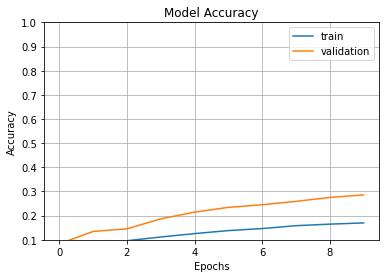

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

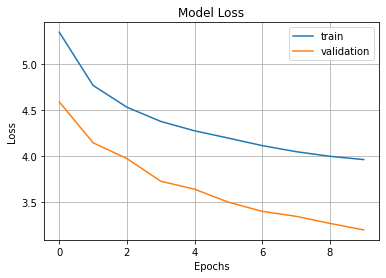

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
test_accu = resnet_model.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

99/99 [==============================] - 336s 3s/step - loss: 3.1278 - accuracy: 0.3035
The testing accuracy is : 30.349206924438477 %


In [ ]:
preds = resnet_model.predict(test,verbose=1)

99/99 [==============================] - 14s 125ms/step
